
# **Project Name**    - Employee Attrition Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

### Problem Statement: 
- Within the context of human resources (HR), attrition is a reduction in the workforce caused by retirement or resignation. This is a serious problem faced by several organizations around the world as attrition is economically damaging to the organizations as the replacement employees have to be hired at a cost and trained again at a cost. High Rates of Attrition also damages the brand value of the company. 
- Now the Dataset belongs to a very fast-growing company. This company has witnessed several employees leaving the company in the last 3 years. The company’s HR team has always been reactive to attrition but now the team wants to be proactive and wished to predict attrition of employees using the data they have in hand. 
- The goal here is to predict whether an employee will leave the company based upon the various variables given in the dataset.


### Need of Attrition Dataset: -
##### 1. Anticipation of Employee Attrition:
Supervisors and HR play a crucial role in workforce management, especially when they have insights into employees contemplating leaving the company. This foreknowledge enables proactive measures such as engaging with these employees to encourage them to stay or planning for the recruitment of suitable replacements to maintain a balanced workforce.

##### 2. Seamless Project Pipeline:
Ensuring a continuous and efficient workflow in a project relies on the consistent contribution of all team members. In the event of a key employee deciding to depart unexpectedly, the project's workflow may experience disruptions. Identifying potential attrition allows for preemptive measures to sustain a smooth and uninterrupted project pipeline.

##### 3. Optimized Hiring Practices:
When HR personnel are aware of employees expressing intentions to leave, they can strategically manage hiring processes. This knowledge empowers them to make informed decisions about the timing and quantity of new hires, ensuring that valuable assets are recruited as needed to maintain operational efficiency.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
import statsmodels
import re


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\python.practice\My_project\New\Train_Dataset.csv")

In [3]:
df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [5]:
df.shape

(7810, 22)

In [6]:
df.columns

Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department',
       'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

In [7]:
df.describe()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,5.180000e+03,5180.000000,4864.000000,4925.000000,4893.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5011.000000,4993.000000,5110.000000,4869.000000,5087.000000
mean,5.112590e+06,0.278958,37.108553,11.107411,57.979767,3.226641,3.012741,3.144402,0.490541,3.157336,0.313514,20.649371,11.165832,2.552838,4.385295,21692.296442
std,1.495482e+03,0.448530,9.248647,8.455577,12.996674,0.872431,1.410602,1.342776,0.499959,2.606036,0.463966,3.706469,7.797783,3.234467,3.617643,4770.637922
min,5.110001e+06,0.000000,18.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,5.111296e+06,0.000000,30.000000,5.000000,49.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,6.000000,1.000000,2.000000,18362.000000
50%,5.112590e+06,0.000000,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,20.000000,9.000000,1.000000,3.000000,20160.000000
75%,5.113885e+06,1.000000,43.000000,16.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,15.000000,3.000000,7.000000,23443.500000
max,5.115180e+06,1.000000,61.000000,121.000000,99.000000,5.000000,5.000000,5.000000,1.000000,21.000000,1.000000,31.000000,41.000000,16.000000,18.000000,95000.000000


In [8]:
df.nunique()

EmployeeID            5180
Attrition                2
Age                     44
TravelProfile            3
Department               3
HomeToWork              35
EducationField           6
Gender                   3
HourlnWeek              58
Involvement              5
WorkLifeBalance          5
Designation              5
JobSatisfaction          5
ESOPs                    2
NumCompaniesWorked      14
OverTime                 2
SalaryHikelastYear      16
WorkExperience          42
LastPromotion           17
CurrentProfile          19
MaritalStatus            4
MonthlyIncome         2372
dtype: int64

In [9]:
def change_attribute(h):
    h = str(h)
    h = h.lower()
    if re.search(r'f', h):
        return 'Female'
    return h

In [10]:
df['Gender'] = df['Gender'].map(change_attribute)
df['Gender'] = df['Gender'].replace({'F': 'Female'})

In [11]:
df['Gender'].value_counts()

Gender
male      3094
nan       2676
Female    2040
Name: count, dtype: int64

In [12]:
def change_attribute_m(e):
    e = str(e)
    e = e.lower()
    if re.search(r'm',e):
        return 'Married'
    return e
df['MaritalStatus'] = df['MaritalStatus'].map(change_attribute_m)
df['MaritalStatus'] = df['MaritalStatus'].replace({'M':'Married'})

In [13]:
df['MaritalStatus'].value_counts()

MaritalStatus
nan         2630
Married     2388
single      1776
divorsed    1016
Name: count, dtype: int64

In [14]:
df.shape

(7810, 22)

In [15]:
df1 = df.iloc[0:6000,:]

In [16]:
df1.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,Married,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,divorsed,21674.0


In [17]:
df.columns

Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department',
       'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

**Handling missing values is a crucial step in data preprocessing, especially when working with predictive modeling or machine learning tasks. Missing data can introduce bias, reduce the effectiveness of models, and lead to inaccurate predictions. Column name and DataType of missing data: -**

 
 -   Age                 (4864 non-null   float64)
 -   Department          (5056 non-null   object)
 -   HomeToWork          (4925 non-null   float64) 
 -   HourlnWeek          (4893 non-null   float64)
  -  Designation         (5142 non-null   object) 
  -  SalaryHikelastYear  (5011 non-null   float64)
  -  WorkExperience      (4993 non-null   float64)
  -  LastPromotion       (5110 non-null   float64)
  -  CurrentProfile      (4869 non-null   float64)
  -  MonthlyIncome       (5087 non-null   float64)

#### Null Values 

In [18]:
df1.isnull().sum()

EmployeeID             820
Attrition              820
Age                   1136
TravelProfile          820
Department             944
HomeToWork            1075
EducationField         820
Gender                   0
HourlnWeek            1107
Involvement            820
WorkLifeBalance        820
Designation            858
JobSatisfaction        820
ESOPs                  820
NumCompaniesWorked     820
OverTime               820
SalaryHikelastYear     989
WorkExperience        1007
LastPromotion          890
CurrentProfile        1131
MaritalStatus            0
MonthlyIncome          913
dtype: int64

In [19]:
df1.isnull().sum()[df1.isnull().sum()>0] / df1.shape[0] * 100

EmployeeID            13.666667
Attrition             13.666667
Age                   18.933333
TravelProfile         13.666667
Department            15.733333
HomeToWork            17.916667
EducationField        13.666667
HourlnWeek            18.450000
Involvement           13.666667
WorkLifeBalance       13.666667
Designation           14.300000
JobSatisfaction       13.666667
ESOPs                 13.666667
NumCompaniesWorked    13.666667
OverTime              13.666667
SalaryHikelastYear    16.483333
WorkExperience        16.783333
LastPromotion         14.833333
CurrentProfile        18.850000
MonthlyIncome         15.216667
dtype: float64

Text(0, 0.5, '%')

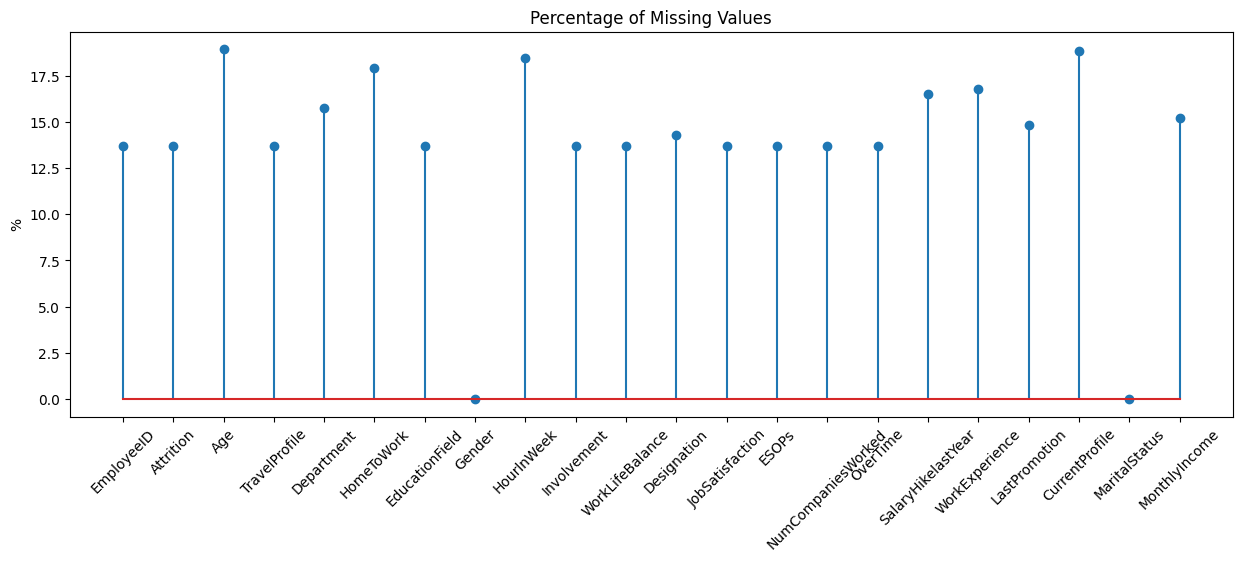

In [20]:
missing_values_per = pd.DataFrame((df1.isnull().sum()/len(df1))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')

In [21]:
list_miss_val = ['Age','HomeToWork','HourlnWeek','SalaryHikelastYear',
                    'WorkExperience','LastPromotion','CurrentProfile','MonthlyIncome']
for col in list_miss_val:
    df1[col] = df1[col].fillna(df1[col].median())

In [22]:
df1['Gender'].replace('nan', np.nan, inplace=True)

In [23]:
df1['Gender'].value_counts()

Gender
male      3094
Female    2040
Name: count, dtype: int64

In [24]:
df1.columns

Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department',
       'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

In [25]:
df1.drop(columns={'EmployeeID'},inplace=True)

In [26]:
df1['Department'] = df1['Department'].fillna('Analytics')
df1['Designation'] = df1['Designation'].fillna('Executive')
df1['Gender'] = df1['Gender'].fillna('male')

In [27]:
df1.MaritalStatus.replace({'nan':'Married'},inplace=True)

In [28]:
df1.Attrition.fillna(0,inplace=True)
df1.TravelProfile.fillna('Rarely',inplace=True)
df1.EducationField.fillna('Other',inplace=True)
df1.Involvement.fillna(df1.Involvement.mean(),inplace=True)
df1.WorkLifeBalance.fillna(df1.WorkLifeBalance.mean(),inplace=True)
df1.JobSatisfaction.fillna(df1.JobSatisfaction.mean(),inplace=True)
df1.ESOPs.fillna(0,inplace=True)
df1.NumCompaniesWorked.fillna(df1.NumCompaniesWorked.mean(),inplace=True)
df1.OverTime.fillna(0,inplace=True)

In [29]:
df1.isnull().sum()[df1.isnull().sum()>0]

Series([], dtype: int64)

#### Analysing Data

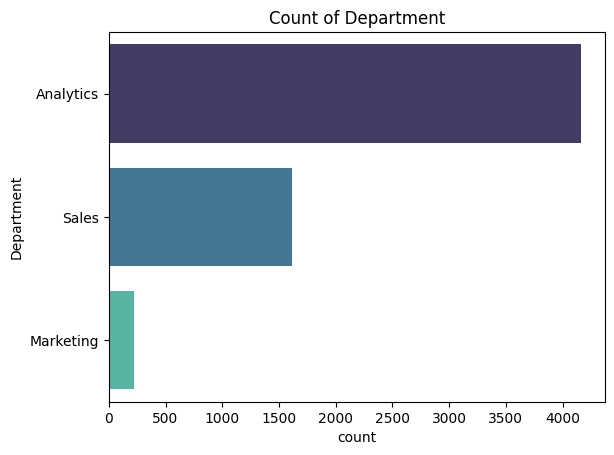

In [30]:
sns.countplot(df1.Department,palette='mako')
plt.title('Count of Department');

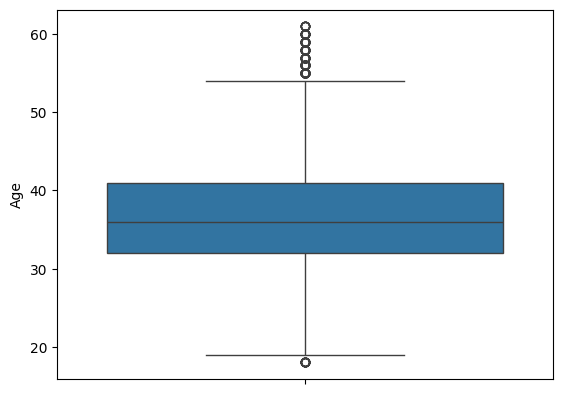

In [31]:
sns.boxplot(df1.Age);

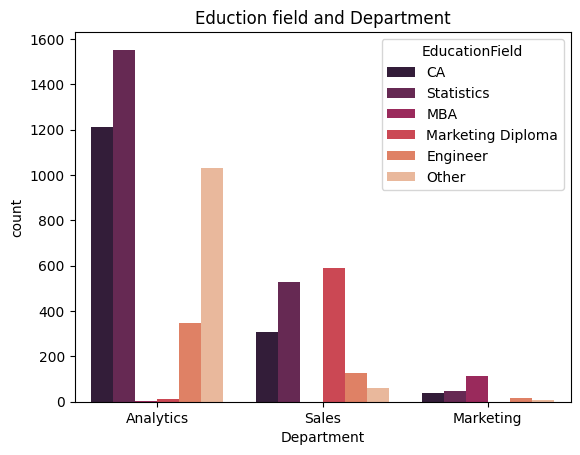

In [32]:
df1.EducationField.value_counts()
sns.countplot(x='Department',hue='EducationField',data=df1,palette='rocket')
plt.title('Eduction field and Department');

Text(0.5, 1.0, 'Job Satisfaction and Designation')

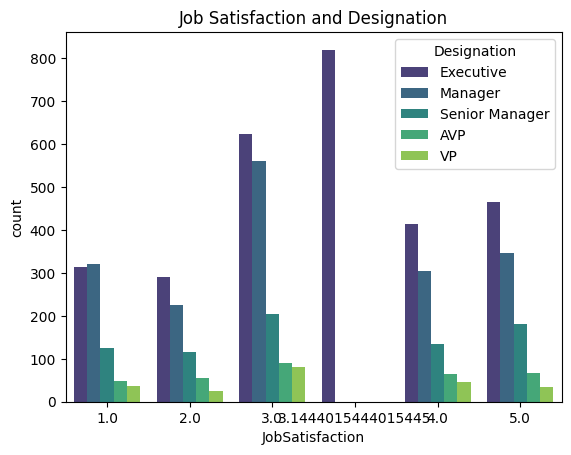

In [33]:
sns.countplot(x='JobSatisfaction',data=df1, hue='Designation',palette='viridis')
plt.title('Job Satisfaction and Designation')

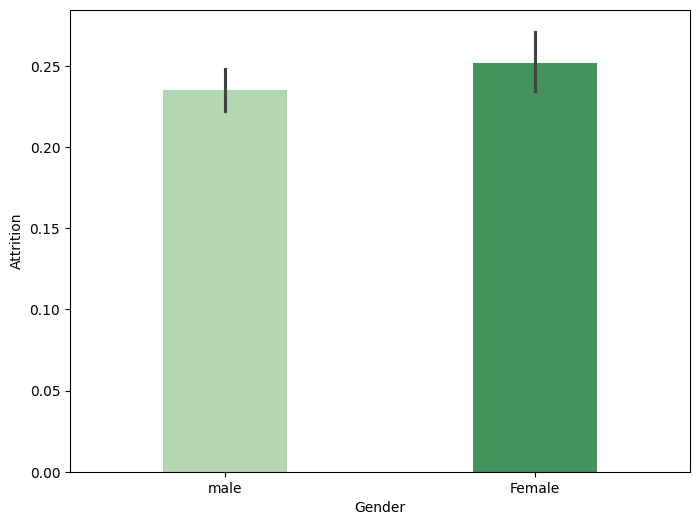

In [34]:
def cat_plot(X,Y):
    plt.figure(figsize=(8,6))
    #plt.subplot(121)
    sns.barplot(df1,x=X,y=Y, width = 0.4,palette='Greens')
    #plt.subplot(122)
    fig = px.pie(df1, names=X, labels=Y, title=f'Pie Chart: {X} vs {Y}')
    plt.show()
    fig.show()

cat_plot('Gender','Attrition');

#### Here, it appears that the likelihood of attrition is significantly associated with gender, potentially influenced by various factors.

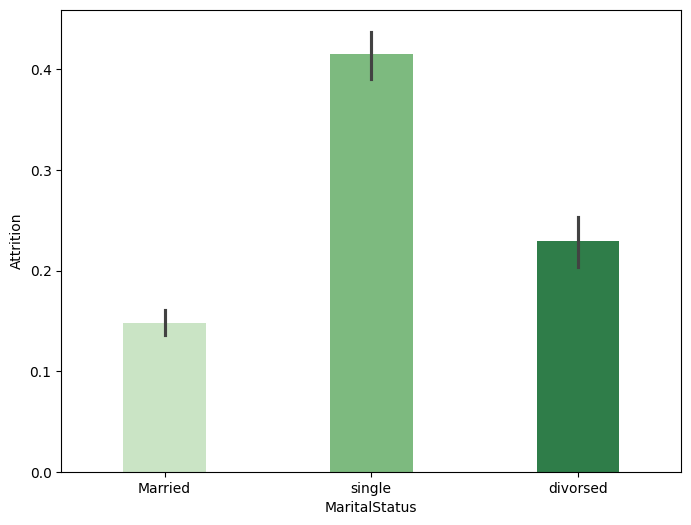

In [35]:
cat_plot('MaritalStatus', 'Attrition')

#### The connection between 'MaritalStatus' and 'Attrition' indicates diverse attrition rates among different marital statuses, encompassing observations in the married, single, and divorced categories.

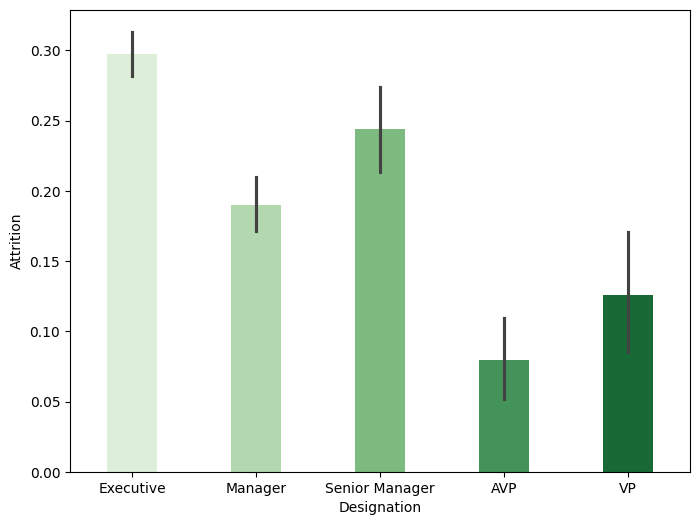

In [36]:
cat_plot('Designation', 'Attrition')

#### Non-Numeric to Numeric

In [37]:
for i in df.dtypes.index[df.dtypes == 'object']:
    a = df[i].value_counts()
    print(f'column: {i}')
    print(a)
    print("****"*8)

column: TravelProfile
TravelProfile
Rarely    3637
Yes       1051
No         492
Name: count, dtype: int64
********************************
column: Department
Department
Analytics    3219
Sales        1615
Marketing     222
Name: count, dtype: int64
********************************
column: EducationField
EducationField
Statistics           2129
CA                   1560
Marketing Diploma     603
Engineer              487
Other                 284
MBA                   117
Name: count, dtype: int64
********************************
column: Gender
Gender
male      3094
Female    2040
nan       1810
Name: count, dtype: int64
********************************
column: Designation
Designation
Executive         2072
Manager           1756
Senior Manager     763
AVP                328
VP                 223
Name: count, dtype: int64
********************************
column: MaritalStatus
MaritalStatus
nan         2630
Married     2388
single      1776
divorsed    1016
Name: count, dtype: int64
**

In [38]:
df1.select_dtypes(include='object')

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,Rarely,Analytics,CA,male,Executive,Married
1,Yes,Sales,Statistics,Female,Executive,single
2,Rarely,Analytics,Statistics,Female,Manager,single
3,Yes,Sales,Statistics,Female,Manager,divorsed
4,No,Analytics,Statistics,Female,Manager,divorsed
...,...,...,...,...,...,...
5995,Rarely,Analytics,Other,male,Executive,Married
5996,Rarely,Analytics,Other,male,Executive,Married
5997,Rarely,Analytics,Other,male,Executive,Married
5998,Rarely,Analytics,Other,male,Executive,Married


In [39]:
df1.select_dtypes(include='object').columns

Index(['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Designation', 'MaritalStatus'],
      dtype='object')

In [40]:
df1[df1.select_dtypes(include='object').columns] = df1[df1.select_dtypes(include='object').columns].apply(le.fit_transform)

In [41]:
df1.select_dtypes(include='object').columns

Index([], dtype='object')

## Feature Selections

In [42]:
df1.corr()

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
Attrition,1.000000,-0.166128,0.155116,0.134664,0.103760,-0.063190,-0.018678,0.014282,0.140661,0.013262,...,0.123521,0.087596,0.048562,0.320110,0.006466,-0.189015,0.001925,-0.161825,0.268926,-0.167876
Age,-0.166128,1.000000,-0.009959,0.011858,0.017790,0.001271,-0.046744,-0.010391,-0.023134,-0.012015,...,-0.016386,0.002326,0.300149,0.017617,0.008370,0.661192,0.243398,0.222743,-0.094928,0.479707
TravelProfile,0.155116,-0.009959,1.000000,0.006572,-0.011111,0.018596,-0.070538,-0.015601,-0.008535,-0.022227,...,-0.027262,0.025891,-0.027888,0.063736,-0.023156,0.002919,0.026517,0.010586,0.064396,-0.017045
Department,0.134664,0.011858,0.006572,1.000000,0.034795,-0.002703,-0.104324,-0.025509,0.033849,-0.002010,...,-0.007924,0.101830,-0.013315,0.068122,-0.012991,0.029931,0.075085,0.067832,0.122698,0.104892
HomeToWork,0.103760,0.017790,-0.011111,0.034795,1.000000,-0.030755,-0.035864,0.053072,-0.003132,0.019825,...,0.009891,0.037595,-0.010689,0.068218,0.062421,0.022107,0.030681,0.027913,0.000544,0.011023
EducationField,-0.063190,0.001271,0.018596,-0.002703,-0.030755,1.000000,0.038412,0.033111,0.003829,0.023515,...,-0.033667,-0.057663,-0.023937,-0.027243,-0.017698,-0.035548,-0.047656,-0.022581,-0.057371,-0.018002
Gender,-0.018678,-0.046744,-0.070538,-0.104324,-0.035864,0.038412,1.000000,0.010149,-0.005926,0.019327,...,-0.031705,-0.091897,-0.017588,-0.086188,-0.020376,-0.081647,-0.087528,-0.085709,-0.127949,-0.070686
HourlnWeek,0.014282,-0.010391,-0.015601,-0.025509,0.053072,0.033111,0.010149,1.000000,-0.016209,0.009104,...,0.049559,-0.005455,0.012108,0.034476,0.003412,-0.023688,-0.034657,-0.003859,-0.053629,-0.025865
Involvement,0.140661,-0.023134,-0.008535,0.033849,-0.003132,0.003829,-0.005926,-0.016209,1.000000,0.001419,...,-0.022173,0.027093,0.007583,0.017556,0.019773,-0.005253,0.013183,-0.046916,0.051360,0.009548
WorkLifeBalance,0.013262,-0.012015,-0.022227,-0.002010,0.019825,0.023515,0.019327,0.009104,0.001419,1.000000,...,0.012179,0.001448,-0.006376,0.016690,-0.002639,-0.020195,-0.012029,-0.000267,-0.018246,-0.004000


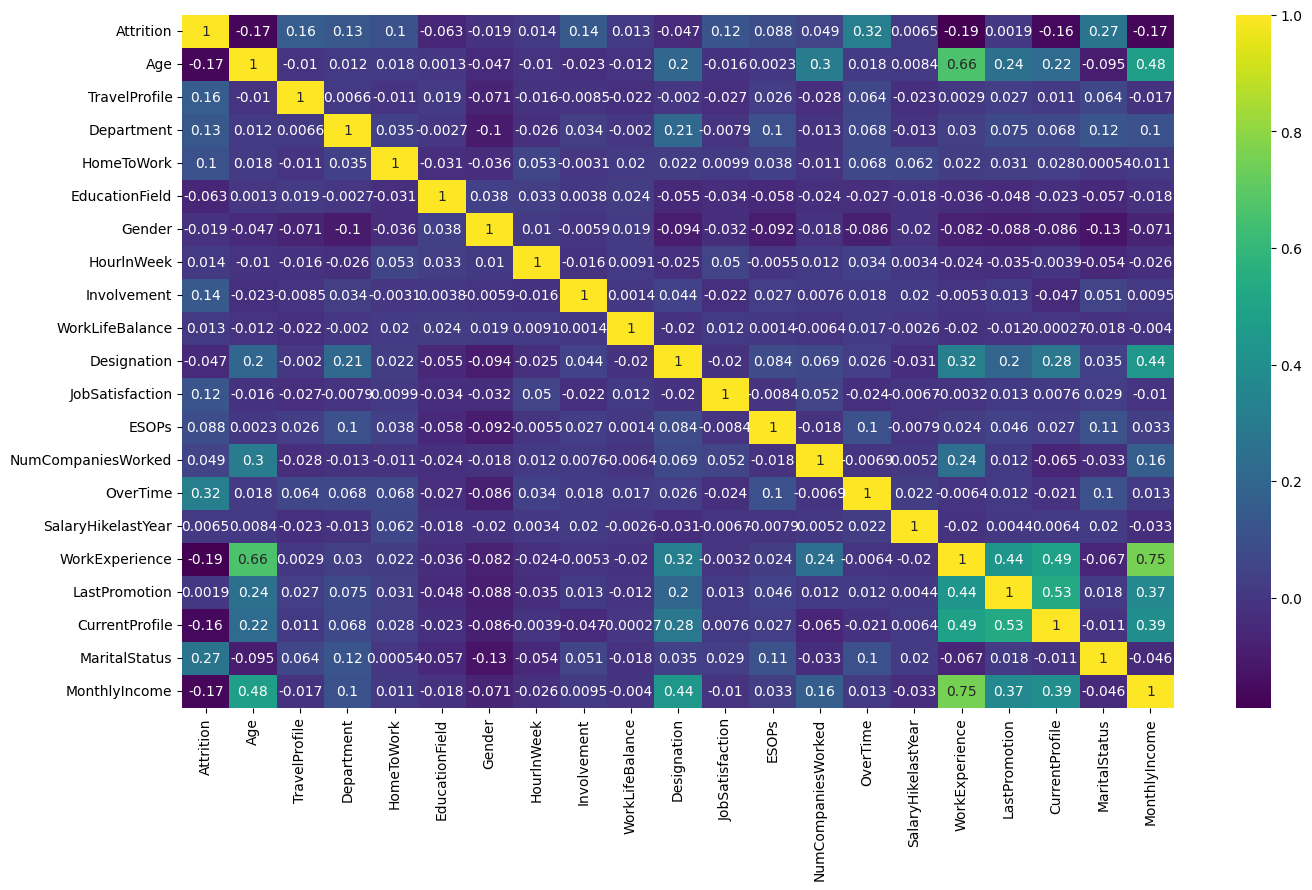

In [43]:
plt.figure(figsize =(16,9))
sns.heatmap(df1.corr(), annot = True ,cmap='viridis');

In [44]:
from boruta import BorutaPy

In [45]:
df_train , df_test = train_test_split(df1,test_size=0.20)

In [46]:
x = df1.iloc[:,0:]
y = df1['Attrition']

In [47]:
x = x.drop('Attrition', axis = 1)
x.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,1,0,5.0,0,1,69.0,1.0,1.0,1,1.0,1.0,1.0,1.0,20.0,7.0,2.0,3.0,0,18932.0
1,32.0,2,2,5.0,5,0,62.0,4.0,3.0,1,2.0,0.0,8.0,0.0,20.0,4.0,1.0,3.0,2,18785.0
2,31.0,1,0,5.0,5,0,45.0,5.0,3.0,2,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,2,22091.0
3,34.0,2,2,10.0,5,0,32.0,3.0,2.0,2,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,1,20302.0
4,37.0,0,0,27.0,5,0,49.0,3.0,4.0,2,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,1,21674.0


In [48]:
df_copy = x

df_x = np.array(x)
df_y = np.array(y)

In [49]:
from sklearn.ensemble import RandomForestClassifier
crf = RandomForestClassifier()

In [50]:
bourta_features_selection = BorutaPy(crf,max_iter=15,verbose=2)
bourta_features_selection.fit(df_x, df_y)

Iteration: 	1 / 15
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	2 / 15
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	3 / 15
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	4 / 15
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	5 / 15
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	6 / 15
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	7 / 15
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	8 / 15
Confirmed: 	14
Tentative: 	0
Rejected: 	6


BorutaPy finished running.

Iteration: 	9 / 15
Confirmed: 	14
Tentative: 	0
Rejected: 	6


BorutaPy(estimator=RandomForestClassifier(n_estimators=1000,
                                          random_state=RandomState(MT19937) at 0x205FA682440),
         max_iter=15, random_state=RandomState(MT19937) at 0x205FA682440,
         verbose=2)

In [51]:
l1 = bourta_features_selection.support_

In [52]:
feature_imp = pd.DataFrame()
feature_imp['feat'] = df_copy.columns
feature_imp['imp'] = l1
feature_imp = feature_imp.sort_values('imp',ascending=False)

In [53]:
feature_imp

,feat,imp
0,Age,True
12,NumCompaniesWorked,True
18,MaritalStatus,True
17,CurrentProfile,True
16,LastPromotion,True
15,WorkExperience,True
14,SalaryHikelastYear,True
13,OverTime,True
10,JobSatisfaction,True
7,Involvement,True


**Let see Which are most Importanat X or Independent variables top 10 variables**

In [54]:
x = df1.iloc[:,0:]
y = df1['Attrition']

In [55]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

from sklearn.feature_selection import RFE

In [56]:
crf_lin = RFE(linear,n_features_to_select= 10 )

In [57]:
crf_lin.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [58]:
crf_lin.support_ 

array([ True, False, False, False, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False,  True, False,
        True, False, False])

In [59]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = x.columns
feat_imp['important'] = crf_lin.support_ 
feat_imp[feat_imp.important == True]

,Features,important
0,Attrition,True
5,EducationField,True
6,Gender,True
8,Involvement,True
9,WorkLifeBalance,True
11,JobSatisfaction,True
12,ESOPs,True
14,OverTime,True
16,WorkExperience,True
18,CurrentProfile,True


## Multi-Colinearity
**Variance Inflation Factor (VIF)**

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
x.values

array([[0.0000e+00, 3.5000e+01, 1.0000e+00, ..., 3.0000e+00, 0.0000e+00,
        1.8932e+04],
       [1.0000e+00, 3.2000e+01, 2.0000e+00, ..., 3.0000e+00, 2.0000e+00,
        1.8785e+04],
       [0.0000e+00, 3.1000e+01, 1.0000e+00, ..., 3.0000e+00, 2.0000e+00,
        2.2091e+04],
       ...,
       [0.0000e+00, 3.6000e+01, 1.0000e+00, ..., 3.0000e+00, 0.0000e+00,
        2.0160e+04],
       [0.0000e+00, 3.6000e+01, 1.0000e+00, ..., 3.0000e+00, 0.0000e+00,
        2.0160e+04],
       [0.0000e+00, 3.6000e+01, 1.0000e+00, ..., 3.0000e+00, 0.0000e+00,
        2.0160e+04]])

In [62]:
Variance_Inflation_Factor = []

for i in range(0 ,x.shape[1]):
    Variance_Inflation_Factor.append(variance_inflation_factor(x.values,i))

In [63]:
Variance_Inflation_Factor

[np.float64(1.8545569427551025),
 np.float64(33.85852312238969),
 np.float64(5.750810422432611),
 np.float64(1.561761068368854),
 np.float64(3.0077918365846426),
 np.float64(3.042000560057877),
 np.float64(3.02407889302412),
 np.float64(22.14610841297455),
 np.float64(15.665220877636367),
 np.float64(6.134729700596001),
 np.float64(5.4566814764103455),
 np.float64(7.275248337858133),
 np.float64(1.7994866034795955),
 np.float64(3.1476687398177887),
 np.float64(1.575089545331037),
 np.float64(29.56087008629765),
 np.float64(10.314908770951059),
 np.float64(2.405034240727209),
 np.float64(4.346422541210517),
 np.float64(1.943761743758563),
 np.float64(50.69488422512385)]

In [64]:
vif_df = pd.DataFrame()
vif_df['Columns'] = x.columns
vif_df['Variance Inflation Factor'] = Variance_Inflation_Factor

In [65]:
vif_df

,Columns,Variance Inflation Factor
0,Attrition,1.854557
1,Age,33.858523
2,TravelProfile,5.750810
3,Department,1.561761
4,HomeToWork,3.007792
5,EducationField,3.042001
6,Gender,3.024079
7,HourlnWeek,22.146108
8,Involvement,15.665221
9,WorkLifeBalance,6.134730


## **Model Buliding**

In [66]:
x = df1.iloc[:,0:]
y = df1['Attrition']

In [67]:
x = x.drop('Attrition', axis = 1)
x.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,1,0,5.0,0,1,69.0,1.0,1.0,1,1.0,1.0,1.0,1.0,20.0,7.0,2.0,3.0,0,18932.0
1,32.0,2,2,5.0,5,0,62.0,4.0,3.0,1,2.0,0.0,8.0,0.0,20.0,4.0,1.0,3.0,2,18785.0
2,31.0,1,0,5.0,5,0,45.0,5.0,3.0,2,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,2,22091.0
3,34.0,2,2,10.0,5,0,32.0,3.0,2.0,2,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,1,20302.0
4,37.0,0,0,27.0,5,0,49.0,3.0,4.0,2,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,1,21674.0


#### Handling Imbalanced Dataset

In [68]:
df1.Attrition.value_counts()

Attrition
0.0    4555
1.0    1445
Name: count, dtype: int64

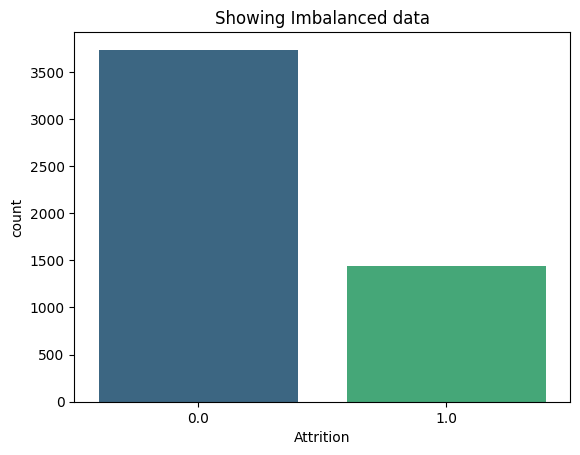

In [69]:
sns.countplot(x=df['Attrition'], data=df, palette='viridis')
plt.title('Showing Imbalanced data');

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
sm=SMOTE()
x_new, y_new = sm.fit_resample(x, y.ravel())

print("Before Using SMOTE, counts of label '1': {}".format(sum(y == 1)))
print("Before Using SMOTE, counts of label '0': {} \n".format(sum(y == 0)))
print("After Using SMOTE, counts of label '1': {}".format(sum(y_new == 1)))
print("After Using SMOTE, counts of label '0': {} \n".format(sum(y_new == 0)))
print('\n')

Before Using SMOTE, counts of label '1': 1445
Before Using SMOTE, counts of label '0': 4555 

After Using SMOTE, counts of label '1': 4555
After Using SMOTE, counts of label '0': 4555 





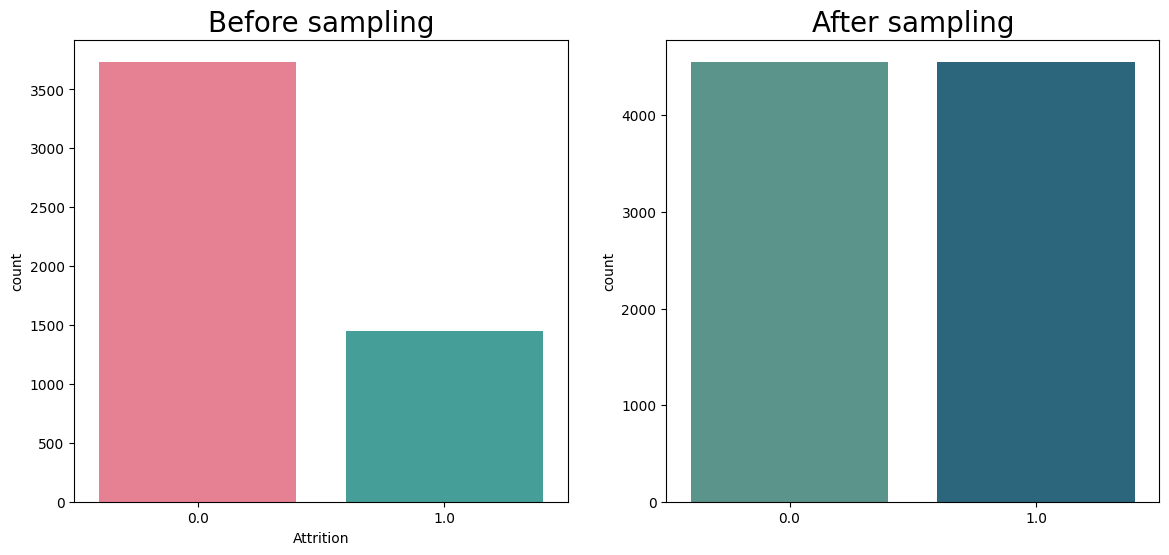

In [72]:
# Visualizing the balanced dataset

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x=df['Attrition'], data=df, palette='husl')
plt.title('Before sampling',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x= y_new,palette='crest')
plt.title('After sampling',fontsize=20)
plt.show()

#### Spilt dataset of X variable and Y variable

In [73]:
df_train_x,df_test_x ,df_train_y, df_test_y= train_test_split(x_new,y_new, test_size= 0.25 , random_state=203)

**Building Models**

We are going to use 9 models in this project for enhanced learning and selecting best model for dataset. As all them are not necessary but to evaluate their accuracy and possible predictive models. 10 models we will building are as follows: - 

1. Logistic Regression 
2. Decision Tree
3. Random Forest Classifier
4. AdaBoost
5. XGBoost 
6. Bagging Classifier 
7. Gradient Boosting
8. KNN Model 
9. Support Vector Machines(SVM)

## 1. Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [75]:
logistic.fit(df_train_x, df_train_y)

LogisticRegression()

In [76]:
pred_test_logistic = logistic.predict(df_test_x)

In [77]:
conf_log = confusion_matrix(df_test_y, pred_test_logistic)
conf_log

array([[807, 352],
       [266, 853]])

In [78]:
acc_logistic = accuracy_score(df_test_y, pred_test_logistic)
acc_logistic

0.7287093942054433

In [79]:
print(classification_report(df_test_y,pred_test_logistic))

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      1159
         1.0       0.71      0.76      0.73      1119

    accuracy                           0.73      2278
   macro avg       0.73      0.73      0.73      2278
weighted avg       0.73      0.73      0.73      2278



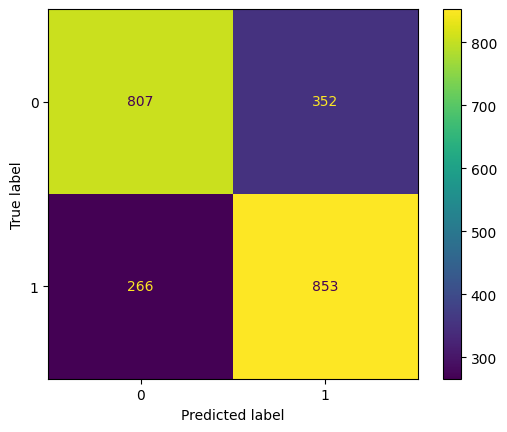

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_logistic))
c_matrix.plot(cmap = plt.cm.viridis)
plt.show()

In [81]:
pred_test_proba_logistic = logistic.predict_proba(df_test_x)[:,1]

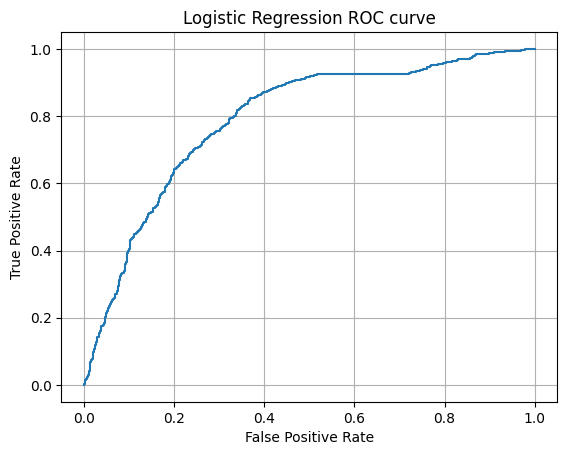

In [82]:
fpr, tpr, _ = roc_curve(df_test_y, pred_test_proba_logistic)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.grid()
plt.show()

The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.

The precision is the ratio of true positive predictions to the total number of positive predictions. The recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precision and recall.

Looking at the evaluation metric scores, we can see that the model has an **overall accuracy of 73%**, meaning that it correctly classified 73% of the instances in the training set. **The precision for class 1 is 71%**, meaning that when the model predicted a class 1 Not good, it was correct 71% of the time. **The recall for class 1 is 76%**, meaning that the model correctly identified 76% of the actual class 1 instances in the dataset. **The F1-score for class 1 is 73%**.

###  Hyperparameter Tuning for Logistic

In [83]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

In [84]:
Cv_score = cross_val_score(logistic,df_train_x,df_train_y, cv = 10,scoring = 'accuracy')
print("cv_score accuracy: ", Cv_score)
print('------'*9)
print("cv score mean accuracy: ", Cv_score.mean())

cv_score accuracy:  [0.73538012 0.70467836 0.73352855 0.72767204 0.761347   0.73499268
 0.73792094 0.74084919 0.72620791 0.72620791]
------------------------------------------------------
cv score mean accuracy:  0.7328784687438459


In [85]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logistic = GridSearchCV(logistic, param_grid, cv=10)

In [86]:
grid_logistic.fit(df_train_x , df_train_y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [87]:
pred_test_log_grid = grid_logistic.predict(df_test_x)

In [88]:
print(classification_report(df_test_y , pred_test_log_grid))

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      1159
         1.0       0.71      0.76      0.74      1119

    accuracy                           0.73      2278
   macro avg       0.73      0.73      0.73      2278
weighted avg       0.73      0.73      0.73      2278



In [89]:
print("Best cross-validation score:", grid_logistic.best_score_)
print("Best parameters:", grid_logistic.best_params_)

Best cross-validation score: 0.7339029308263337
Best parameters: {'C': 10}


Looking after Hyperparameter Tuning for Logistic at the evaluation metric scores, we can see that the model has an **overall accuracy of 74%**, meaning that it correctly classified 74% of the instances in the training set. **The precision for class 1 is 71%**, meaning that when the model predicted a class 1 Not good, it was correct 71% of the time. **The recall for class 1 is 76%**, meaning that the model correctly identified 75% of the actual class 1 instances in the dataset. **The F1-score for class 1 is 74%**.


#### We did not see any improvement here.

## 2. Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

dec.fit(df_train_x,df_train_y)

DecisionTreeClassifier()

In [91]:
pred_test_decision = dec.predict(df_test_x)

In [92]:
conf_dec = confusion_matrix(df_test_y,pred_test_decision)
conf_dec

array([[1096,   63],
       [  30, 1089]])

In [93]:
acc_decision = accuracy_score(df_test_y, pred_test_decision)
acc_decision

0.9591747146619842

In [94]:
print(classification_report(df_test_y,pred_test_decision))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1159
         1.0       0.95      0.97      0.96      1119

    accuracy                           0.96      2278
   macro avg       0.96      0.96      0.96      2278
weighted avg       0.96      0.96      0.96      2278



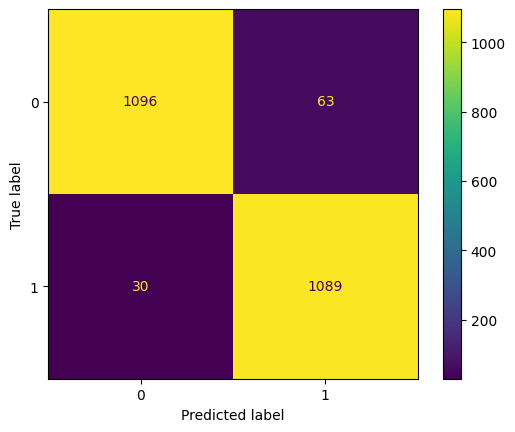

In [95]:
c_matrix_decision = ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_decision))
c_matrix_decision.plot(cmap = plt.cm.viridis)
plt.show()

In [96]:
l1 = dec.feature_importances_
l1

array([0.1078863 , 0.01589805, 0.02687066, 0.06080712, 0.03202645,
       0.01051475, 0.04559756, 0.04677253, 0.00756531, 0.01075013,
       0.07048025, 0.00153079, 0.04762696, 0.20628665, 0.0437568 ,
       0.02457438, 0.03146138, 0.05979376, 0.02729667, 0.1225035 ])

In [97]:
depth = dec.tree_.max_depth
print("Depth of tree, Decision Tree is: ",depth)

Depth of tree, Decision Tree is:  20


In [98]:
Feature_important = pd.DataFrame()
Feature_important['Features'] = df_train_x.columns
Feature_important['IMP'] = l1
Feature_important

,Features,IMP
0,Age,0.107886
1,TravelProfile,0.015898
2,Department,0.026871
3,HomeToWork,0.060807
4,EducationField,0.032026
5,Gender,0.010515
6,HourlnWeek,0.045598
7,Involvement,0.046773
8,WorkLifeBalance,0.007565
9,Designation,0.010750


In [ ]:
                 precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1159
         1.0       0.95      0.97      0.96      1119

    accuracy                           0.96

The ML model used is Decision Tree for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.96**, which means that 96% of the predictions made by the model are correct. **The precision for class 1 is 0.95**, which means that out of all the positive predictions made for class 1, 95 % of them are actually correct. **The recall for class 1 is 0.97**, which means that out of all the actual positive instances of class 1, the model correctly identified 97% of them. **The F1-score for class 1 is 0.96**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

## Hyperparameter Tuning of Decision Tree

In [99]:
Decision_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20],
    'min_samples_split':[25,50,75,100]
}

In [100]:
grid = GridSearchCV(dec, Decision_grid)

In [101]:
grid.fit(df_train_x , df_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 20],
                         'min_samples_split': [25, 50, 75, 100]})

In [102]:
grid_predict_decision = grid.predict(df_test_x)
confusion_matrix(df_test_y , grid_predict_decision)

array([[1066,   93],
       [  70, 1049]])

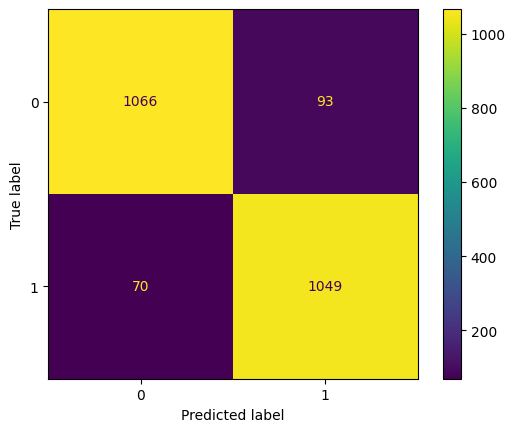

In [103]:
c_matrix_decision = ConfusionMatrixDisplay(confusion_matrix(df_test_y, grid_predict_decision))
c_matrix_decision.plot(cmap = plt.cm.viridis)
plt.show()

In [104]:
print(classification_report(df_test_y,grid_predict_decision ))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1159
         1.0       0.92      0.94      0.93      1119

    accuracy                           0.93      2278
   macro avg       0.93      0.93      0.93      2278
weighted avg       0.93      0.93      0.93      2278



Looking after Hyperparameter Tuning for Random Forest at the evaluation metric scores, we can see that the model has an **overall accuracy of 93%**, meaning that it correctly classified 93% of the instances in the training set. **The precision for class 1 is 92%**, meaning that when the model predicted a class 1 Not good, it was correct 92% of the time. **The recall for class 1 is 94%**, meaning that the model correctly identified 94 % of the actual class 1 instances in the dataset. **The F1-score for class 1 is 93%**.


## 3. Random Forest Model

In [106]:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier()

Random.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [107]:
pred_test_Random = Random.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_Random)

array([[1133,   26],
       [   9, 1110]])

In [108]:
acc_crf = accuracy_score(df_test_y, pred_test_Random)

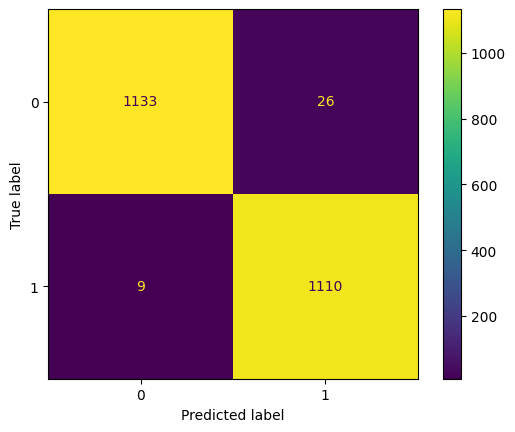

In [109]:
c_matrix_random = ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_Random))
c_matrix_random.plot(cmap = plt.cm.viridis)
plt.show()

In [110]:
print(classification_report(df_test_y , pred_test_Random))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1159
         1.0       0.98      0.99      0.98      1119

    accuracy                           0.98      2278
   macro avg       0.98      0.98      0.98      2278
weighted avg       0.98      0.98      0.98      2278



The ML model used is Random Forest for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 98%**, which means that 98 % of the predictions made by the model are correct. **The precision for class 1 is 98%**, which means that out of all the positive predictions made for class 1, 98 % of them are actually correct. **The recall for class 1 is 99%**, which means that out of all the actual positive instances of class 1, the model correctly identified 99 % of them. **The F1-score for class 1 is 98%**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

## Hyperparameter Tuning of Rnadom Forest

In [111]:
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
clsr.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [113]:
pred_test_Random_hyper = clsr.predict(df_test_x)

In [114]:
confusion_matrix(df_test_y , pred_test_Random_hyper)

array([[1000,  159],
       [ 121,  998]])

In [115]:
print(classification_report(df_test_y , pred_test_Random_hyper))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      1159
         1.0       0.86      0.89      0.88      1119

    accuracy                           0.88      2278
   macro avg       0.88      0.88      0.88      2278
weighted avg       0.88      0.88      0.88      2278



#### We saying after Hyperparameter Tuning of Rnadom Forest model that model performing poor performance comparing the without hyperparameter

## 4. AdaBoost

**AdaBoost for Decision Tree model**

In [116]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(dec)

ada.fit(df_train_x, df_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [117]:
pred_test_ada = ada.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_ada)

array([[1096,   63],
       [  26, 1093]])

In [118]:
acc_ada = accuracy_score(df_test_y, pred_test_ada)

In [119]:
print(classification_report(df_test_y , pred_test_ada))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1159
         1.0       0.95      0.98      0.96      1119

    accuracy                           0.96      2278
   macro avg       0.96      0.96      0.96      2278
weighted avg       0.96      0.96      0.96      2278



**AdaBoost for Random Forest model**

In [120]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(Random)

ada.fit(df_train_x, df_train_y)

AdaBoostClassifier(estimator=RandomForestClassifier())

In [121]:
pred_test_ada_Random = ada.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_ada_Random)

array([[1134,   25],
       [  12, 1107]])

In [122]:
print(classification_report(df_test_y , pred_test_ada_Random))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1159
         1.0       0.98      0.99      0.98      1119

    accuracy                           0.98      2278
   macro avg       0.98      0.98      0.98      2278
weighted avg       0.98      0.98      0.98      2278



## 5. XGBoost Model

In [123]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(df_train_x,df_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [127]:
pred_test_Xgboost = xgb.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_Xgboost)

array([[1135,   24],
       [   9, 1110]])

In [128]:
acc_xgboost = accuracy_score(df_test_y, pred_test_Xgboost)

In [129]:
print(classification_report(df_test_y , pred_test_Xgboost))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1159
         1.0       0.98      0.99      0.99      1119

    accuracy                           0.99      2278
   macro avg       0.99      0.99      0.99      2278
weighted avg       0.99      0.99      0.99      2278



In [130]:
cv_score = cross_val_score(xgb,df_train_x,df_train_y, cv = 5, scoring = 'accuracy')
print("cross validation score: ", cv_score)
print('------'*9)
print("cross validation score mean: ", cv_score.mean())

cross validation score:  [0.98756401 0.98829554 0.97657394 0.98901903 0.96852123]
------------------------------------------------------
cross validation score mean:  0.9819947497003729


## 6. Bagging Classifier Model

In [131]:
from sklearn.ensemble import BaggingClassifier
bgg = BaggingClassifier()

bgg.fit(df_train_x, df_train_y)

BaggingClassifier()

In [132]:
pred_test_bagging = bgg.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_bagging)

array([[1123,   36],
       [  25, 1094]])

In [133]:
acc_bagging = accuracy_score(df_test_y, pred_test_bagging)

In [134]:
print(classification_report(df_test_y , pred_test_bagging))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1159
         1.0       0.97      0.98      0.97      1119

    accuracy                           0.97      2278
   macro avg       0.97      0.97      0.97      2278
weighted avg       0.97      0.97      0.97      2278



In [135]:
cv_score = cross_val_score(bgg, df_train_x, df_train_y , cv = 5, scoring = 'accuracy')
print("CV Score: ", cv_score)
print("------"*9)
print("CV mean score: ", cv_score.mean())

CV Score:  [0.97073884 0.97000732 0.96778917 0.96632504 0.95754026]
------------------------------------------------------
CV mean score:  0.9664801250132543


## 7. Gradient Descent

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(df_train_x, df_train_y)

GradientBoostingClassifier()

In [137]:
pred_test_Gboost = gbc.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_Gboost)

array([[1067,   92],
       [ 134,  985]])

In [138]:
acc_gboost = accuracy_score(df_test_y, pred_test_Gboost)

In [139]:
print(classification_report(df_test_y , pred_test_Gboost))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      1159
         1.0       0.91      0.88      0.90      1119

    accuracy                           0.90      2278
   macro avg       0.90      0.90      0.90      2278
weighted avg       0.90      0.90      0.90      2278



## 8. K-Nearest Neighbours(KNN)

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(df_train_x,df_train_y)
    y_pred_test_knn = knn.predict(df_test_x)
    error_rate.append(1 - accuracy_score(df_test_y,y_pred_test_knn))

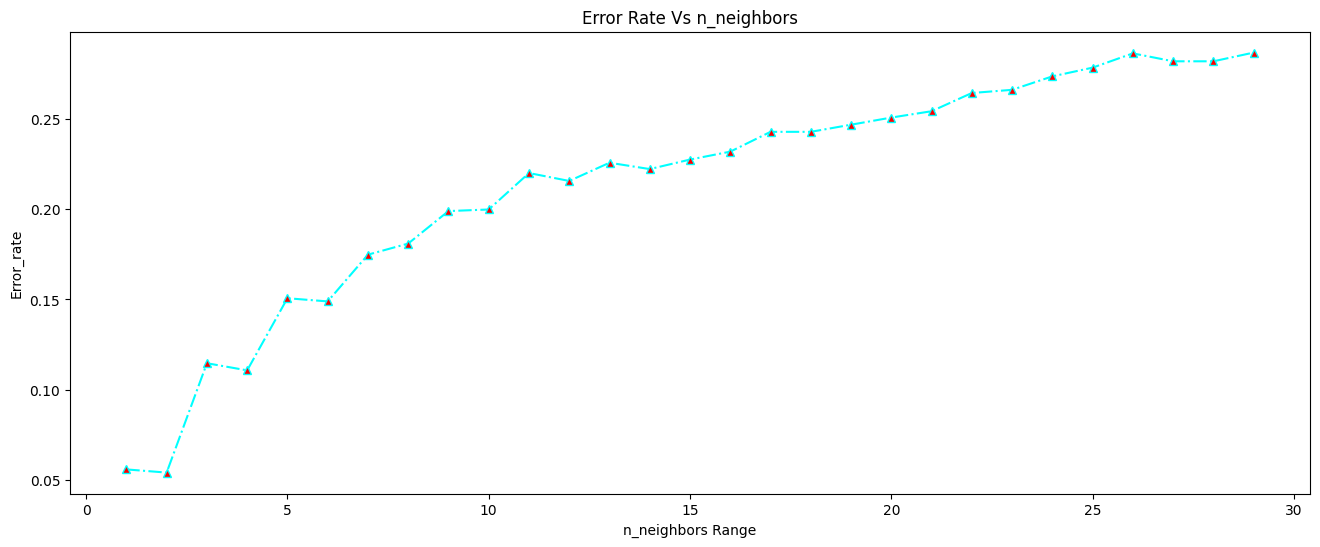

In [142]:
# Let's Visualize all error Rates

plt.figure(figsize=(16,6))
plt.plot(range(1,30),error_rate, color='cyan', marker = '^', linestyle = '-.', markerfacecolor = 'red' )
plt.title("Error Rate Vs n_neighbors")
plt.xlabel("n_neighbors Range")
plt.ylabel("Error_rate")
plt.show()

**As we can see in above visualization the best n_neighbors =1, which shows us that only single dataset is providing the best performance. But, n_neighbors = 1 can lead to problem low bias and high variance. To solve this problem we have to do trade off between bian and variance we will choose next n_neighbors which can solve problem of this sensitivity and will imporove performance of our model.**


In [143]:
knn = KNeighborsClassifier()
knn.fit(df_train_x,df_train_y)

KNeighborsClassifier()

In [144]:
pred_test_knn = knn.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_knn)

array([[ 846,  313],
       [  30, 1089]])

In [145]:
acc_knn = accuracy_score(df_test_y, pred_test_knn)

In [146]:
print(classification_report(df_test_y , pred_test_knn))

              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83      1159
         1.0       0.78      0.97      0.86      1119

    accuracy                           0.85      2278
   macro avg       0.87      0.85      0.85      2278
weighted avg       0.87      0.85      0.85      2278



## 9. Support Vector Machines(SVM)

In [147]:
from sklearn.svm import SVC
# kernel = 'linear'
svc_linear = SVC(kernel = "linear")
svc_linear.fit(df_train_x, df_train_y)

#kernel = 'sigmoid'
svc_sigmoid = SVC(kernel = "sigmoid")
svc_sigmoid.fit(df_train_x, df_train_y)

# kernel = 'poly'
svc_poly = SVC(kernel = "poly")
svc_poly.fit(df_train_x, df_train_y)

# kernel = 'rbf'
svc_rbf = SVC(kernel = "rbf")
svc_rbf.fit(df_train_x, df_train_y)

SVC()

In [148]:

# kernel = 'linear'

y_pred_train = svc_linear.predict(df_train_x)
y_pred_test = svc_linear.predict(df_test_x)
acc_score_lr_train = accuracy_score(df_train_y, y_pred_train)
acc_score_lr_test = accuracy_score(df_test_y, y_pred_test)
print("Linear Model:- ")
print()
print("Train Accuracy score: ",acc_score_lr_train * 100 )
print("Test Accuracy Score: ",acc_score_lr_test * 100)
print("--------"*9)


# kernel = 'sigmoid'

y_pred_train_s = svc_sigmoid.predict(df_train_x)
y_pred_test_s = svc_sigmoid.predict(df_test_x)
acc_score_sg_train = accuracy_score(df_train_y, y_pred_train_s)
acc_score_sg_test = accuracy_score(df_test_y, y_pred_test_s)
print("Sigmoid Model:- ")
print()
print("Train Accuracy score: ",acc_score_sg_train * 100 )
print("Test Accuracy Score: ",acc_score_sg_test * 100)
print("--------"*9)

# kernel = 'poly'

y_pred_train_p = svc_poly.predict(df_train_x)
y_pred_test_p = svc_poly.predict(df_test_x)
acc_score_pl_train = accuracy_score(df_train_y, y_pred_train_p)
acc_score_pl_test = accuracy_score(df_test_y, y_pred_test_p)
print("Poly Model:- ")
print()
print("Train Accuracy score: ",acc_score_pl_train * 100 )
print("Test Accuracy Score: ",acc_score_pl_test * 100)
print("--------"*9)

# kernel = 'rbf'

y_pred_train_rbf = svc_rbf.predict(df_train_x)
y_pred_test_rbf = svc_rbf.predict(df_test_x)
acc_score_rbf_train = accuracy_score(df_train_y, y_pred_train_rbf)
acc_score_rbf_test = accuracy_score(df_test_y, y_pred_test_rbf)
print("Sigmoid Model:- ")
print()
print("Train Accuracy score: ",acc_score_rbf_train * 100 )
print("Test Accuracy Score: ",acc_score_rbf_test * 100)
print("--------"*9)

Linear Model:- 

Train Accuracy score:  71.64812646370024
Test Accuracy Score:  72.87093942054433
------------------------------------------------------------------------
Sigmoid Model:- 

Train Accuracy score:  35.37763466042155
Test Accuracy Score:  35.3819139596137
------------------------------------------------------------------------
Poly Model:- 

Train Accuracy score:  53.908079625292736
Test Accuracy Score:  53.204565408252854
------------------------------------------------------------------------
Sigmoid Model:- 

Train Accuracy score:  64.85655737704919
Test Accuracy Score:  65.32045654082529
------------------------------------------------------------------------


In [149]:
list1 = ['SVM_Linear','SVM_Sigmoid','SVM_Poly','SVM_RBF']
list2 = [acc_score_lr_test,acc_score_sg_test,acc_score_pl_test,
        acc_score_rbf_test]
list3 = [acc_score_lr_train,acc_score_sg_train,acc_score_pl_train,
        acc_score_rbf_train]
df_train_accuracy = pd.DataFrame({'Method Used':list1, "Accuracy": list3})
df_test_accuracy = pd.DataFrame({'Method Used':list1, "Accuracy": list2})

Axes(0.125,0.11;0.775x0.77)


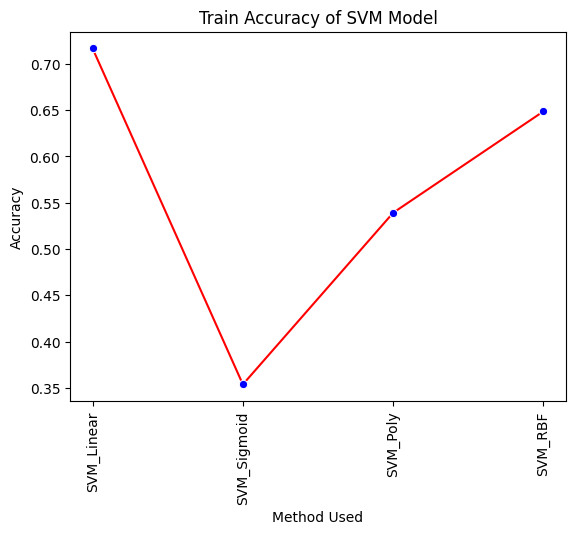

In [150]:
train_plot = sns.lineplot(x = 'Method Used', y = 'Accuracy',data = df_train_accuracy, color = 'red', marker = 'o', markerfacecolor = 'blue')
train_plot.set_xticklabels(train_plot.get_xticklabels(), rotation = 90)
plt.title("Train Accuracy of SVM Model")
print(train_plot)

Axes(0.125,0.11;0.775x0.77)


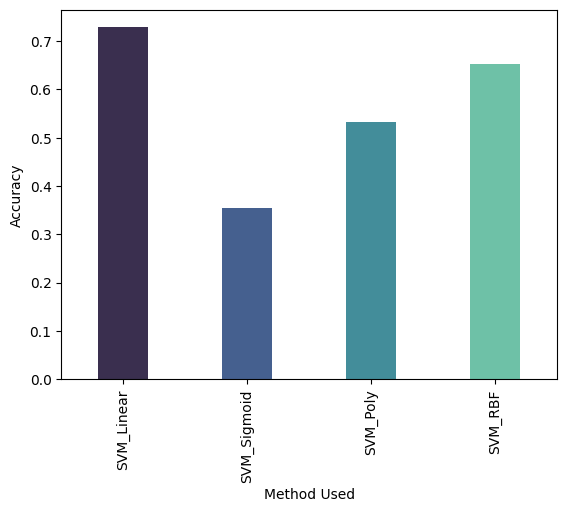

In [151]:
test_plot = sns.barplot(x='Method Used', y='Accuracy', data = df_test_accuracy, width =0.4, palette='mako')
test_plot.set_xticklabels(test_plot.get_xticklabels(), rotation = 90)
print(test_plot)

In [152]:
list_final_model = ['logistic', 'dec','Random','ada', 'xgb','bgg','gbc','knn'
                    ,'svc_linear','svc_sigmoid','svc_poly','scv_rbf']


list_final_acc_test_model  = [acc_logistic, acc_decision, acc_crf, acc_ada, acc_xgboost, acc_bagging, acc_gboost
                              , acc_knn, acc_score_lr_test, acc_score_sg_test, acc_score_pl_test, acc_score_rbf_test ]


df_test_accuracy_final_allmodel = pd.DataFrame({'Method Used':list_final_model, "Accuracy": list_final_acc_test_model})

In [153]:
figure = px.bar(df_test_accuracy_final_allmodel,x = 'Method Used', y = 'Accuracy', text = 'Accuracy', 
                labels = { 'Accuracy':'Accuracy'}, title = 'Final Model - Method Used vs Accuracy')
figure.update_layout(xaxis_tickangle = -60)
figure.show()

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [155]:
class_model = {
    'xgb': XGBClassifier(),
    'gbc': GradientBoostingClassifier(),
    'bgc': BaggingClassifier(),
    'rfc': RandomForestClassifier(),
    'ada': AdaBoostClassifier(),
    
}

class_hyperparams = {
    'xgb': {'xgb__n_estimators': [100, 300,400], 'xgb__max_depth': [5,6,7,8], 'xgb__learning_rate': [0.005,0.007,0.008]},
    'gbc': {'gbc__n_estimators': [50, 100], 'gbc__learning_rate': [0.01, 0.001], 'gbc__max_depth': [5,6,7,8]},
    'bgc': {'bgc__n_estimators': [10,20,30], 'bgc__max_features': [0.4,0.5]},
    'rfc': {'rfc__n_estimators': [50, 100, 200], 'rfc__max_depth': [5,6,7,8  ]},
    'ada': {'ada__n_estimators': [50, 100, 200], 'ada__learning_rate': [0.01, 0.1]},
    
}

In [156]:
for cl_name, cls in class_model.items():
    class_hyperparam = class_hyperparams[cl_name]
    pipeline = Pipeline([('Scaler', StandardScaler()), (cl_name, cls)])
    
    grid_search = GridSearchCV(pipeline, class_hyperparam, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(df_train_x, df_train_y)
    
    print("-------" * 9)
    print(f"Best parameters for {cl_name} : {grid_search.best_params_}")
    
    
    
    print("ACCURACY: -")
    
    y_pred_train = grid_search.predict(df_train_x)
    y_pred_test = grid_search.predict(df_test_x)
    
    accuracy_train = accuracy_score(df_train_y, y_pred_train)
    accuracy_test = accuracy_score(df_test_y, y_pred_test)
    
    print(f"Accuracy on train set for {cl_name}: {accuracy_train}")
    print(f"Accuracy on test set for {cl_name}: {accuracy_test}")

---------------------------------------------------------------
Best parameters for xgb : {'xgb__learning_rate': 0.008, 'xgb__max_depth': 8, 'xgb__n_estimators': 400}
ACCURACY: -
Accuracy on train set for xgb: 0.9888758782201406
Accuracy on test set for xgb: 0.9574187884108868
---------------------------------------------------------------
Best parameters for gbc : {'gbc__learning_rate': 0.01, 'gbc__max_depth': 8, 'gbc__n_estimators': 100}
ACCURACY: -
Accuracy on train set for gbc: 0.9638466042154566
Accuracy on test set for gbc: 0.9332748024582967
---------------------------------------------------------------
Best parameters for bgc : {'bgc__max_features': 0.4, 'bgc__n_estimators': 20}
ACCURACY: -
Accuracy on train set for bgc: 1.0
Accuracy on test set for bgc: 0.9885864793678666
---------------------------------------------------------------
Best parameters for rfc : {'rfc__max_depth': 8, 'rfc__n_estimators': 200}
ACCURACY: -
Accuracy on train set for rfc: 0.9615046838407494
Accurac

#### In ouput of above code we can see best model with hiest accuracy isXGBClassifier. Hence will make above changes in XGBoost model as suggested in above code.
#### For XGBClassifier suggested changes are as follows:
---> Best parameters for xgb : {'xgb__learning_rate': 0.008, 'xgb__max_depth': 8, 'xgb__n_estimators': 300}
- Note: - KNN model has more accuracy but neighbors considered are quite low which will affect the prediction.

In [157]:
xgb1 = XGBClassifier(n_estimators = 300, max_depth = 8, learning_rate = 0.008)
xgb1.fit(df_train_x,df_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.008, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Final Analysis for Employee Attrition Prediction ML Project:**

**Introduction:**
Employee attrition poses a substantial challenge for organizations, leading to economic losses, escalated recruitment expenses, and potential damage to the company's brand value. In this Machine Learning initiative, our goal was to predict employee attrition for a rapidly expanding company by leveraging various predictive models. The dataset furnished insights into employee-related variables, prompting the implementation of diverse algorithms to bolster the HR team's proactive approach.

**Dataset Overview:**
The dataset encompassed comprehensive information about employees, including age, years of experience, job role, satisfaction scores, performance ratings, and more. The target variable was binary, indicating whether an employee left the company or not.

**Data Preprocessing:**
Our process commenced with meticulous data exploration, addressing missing values, and encoding categorical variables. Employing Exploratory Data Analysis (EDA), we gained insights into feature distributions and their relationships with the target variable. Additionally, feature engineering was conducted to extract meaningful insights and enhance overall model performance.

**Model Building:**
Several machine learning algorithms were deployed to predict employee attrition:

1. **Logistic Regression:**
   - Known for its interpretability and efficiency in binary classification.
   - Provided a baseline for performance comparison with more complex models.

2. **Decision Tree:**
   - Captured non-linear relationships in the data.
   - Facilitated visualization of decision-making processes.

3. **XGBoost:**
   - Proved to be a robust and scalable algorithm.
   - Effectively handled complex relationships, boosting overall predictive performance.

4. **AdaBoost:**
   - Emphasized misclassified samples, thereby improving model accuracy.
   - Integrated seamlessly with weak learners.

5. **Bagging (Random Forest):**
   - Mitigated overfitting and enhanced model stability.
   - Aggregated predictions from multiple decision trees.

6. **Support Vector Machine (SVM):**
   - Effectively captured complex decision boundaries.
   - Demonstrated efficacy in handling high-dimensional data and non-linear relationships.

7. **Naive Bayes:**
   - Offered simplicity coupled with efficiency for classification tasks.
   - Suited scenarios where independence among features was a reasonable assumption.

**Model Evaluation:**
The evaluation of model performance encompassed metrics such as accuracy, precision, recall etc. Employing cross-validation ensured robust assessments, while hyperparameter tuning optimized model parameters. Comparative analysis allowed for the identification of the most suitable algorithm for addressing the specific attrition prediction challenge.

**Results and Recommendations:**
After a comprehensive evaluation, it was evident that XGB outperformed others with  Best parameters for xgb : {'xgb__learning_rate': 0.008, 'xgb__max_depth': 8, 'xgb__n_estimators': 300}. Key features contributing to attrition were identified, providing actionable insights for the HR team. We strongly recommend the implementation of this model into the company's HR system to facilitate proactive attrition management.

**Conclusion:**
This ML project has effectively tackled the challenge of predicting employee attrition in a rapidly growing company. The proactive approach enabled by predictive models empowers the HR team to take preventative measures, ultimately reducing attrition rates and positively impacting the company's overall performance and brand value. Continuous monitoring and periodic model updates are advised to ensure the ongoing effectiveness of the implemented solution.